In [25]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

# Set plot style
plt.style.use('seaborn')

# Set plot size
plt.rcParams['figure.figsize'] = [15,6]

In [44]:
df = pd.read_csv('data/us.csv')
data = df.drop('deaths', axis = 1)
data

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
...,...,...
181,2020-07-20,3845124
182,2020-07-21,3910398
183,2020-07-22,3980128
184,2020-07-23,4050126


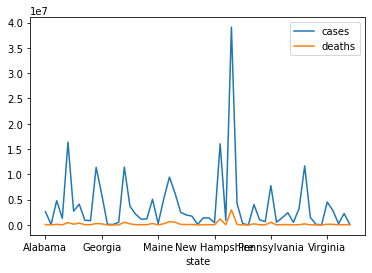

In [16]:
df.groupby('state')['cases','deaths'].sum().plot()

In [45]:
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set the index of the DataFrame to the date column
data.set_index('date', inplace = True)

# Print DataFrame summary
data.info()

# Print DataFrame
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-21 to 2020-07-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   186 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


,cases
date,
2020-01-21,1
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,3
...,...
2020-07-20,3845124
2020-07-21,3910398
2020-07-22,3980128


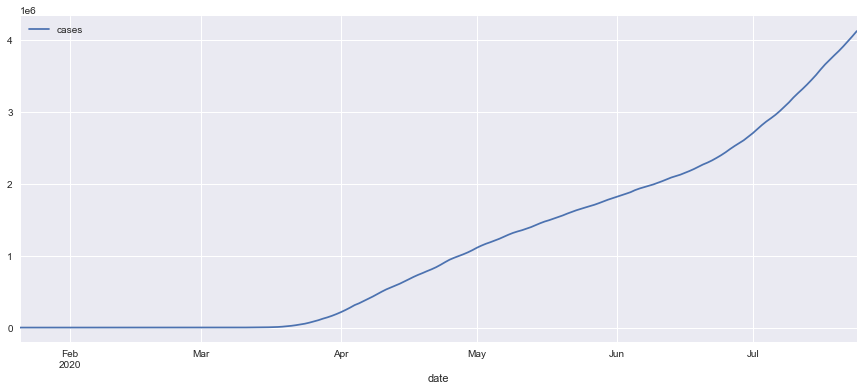

In [46]:
# Plot the series
data.plot()

In [53]:
# Resample the data to the average monthly values
data_daily = data.resample("D").mean()

# Print the head of data
print(data.head())

# Print the head of resampled data
print(data_daily.head())


cases
date             
2020-01-21      1
2020-01-22      1
2020-01-23      1
2020-01-24      2
2020-01-25      3
            cases
date             
2020-01-21      1
2020-01-22      1
2020-01-23      1
2020-01-24      2
2020-01-25      3


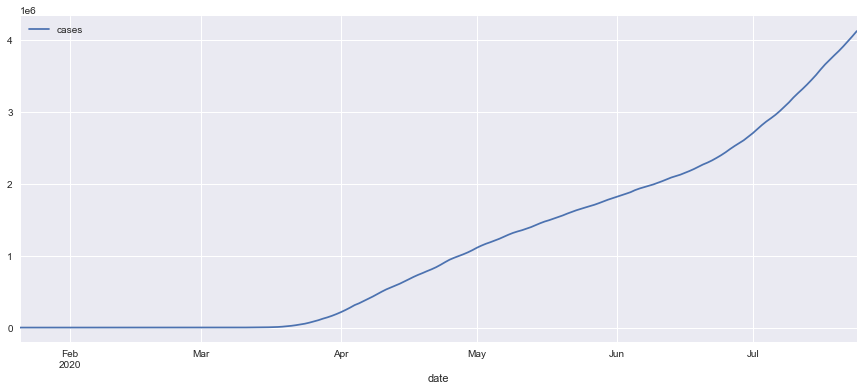

In [54]:
# Plot resampled data
data_daily.plot()

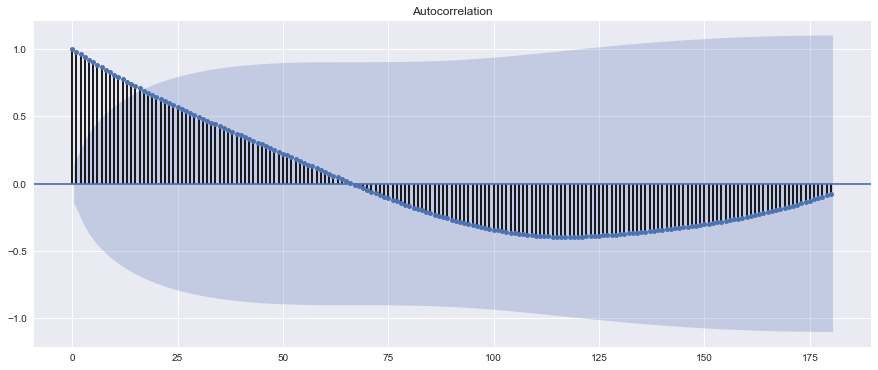

In [57]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(data_weekly, lags = 180); 

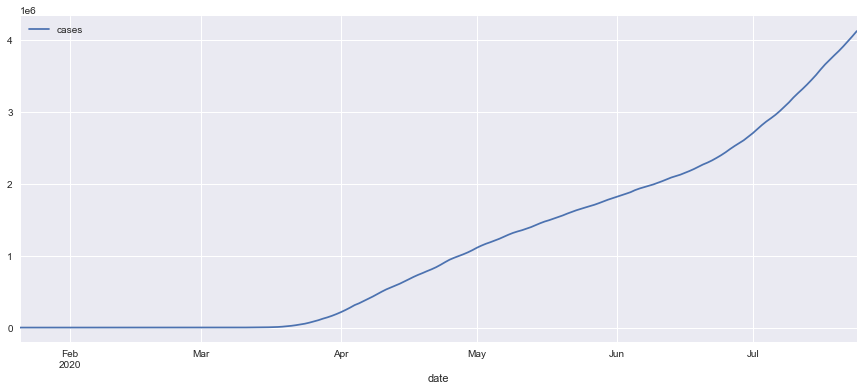

In [59]:
# Plot data_monthly again
data_daily.plot()

In [61]:
# Difference data_monthly
data_daily_diff = data_daily.diff()

# Show differenced values
data_daily_diff.head()

,cases
date,
2020-01-21,NaN
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,1.0


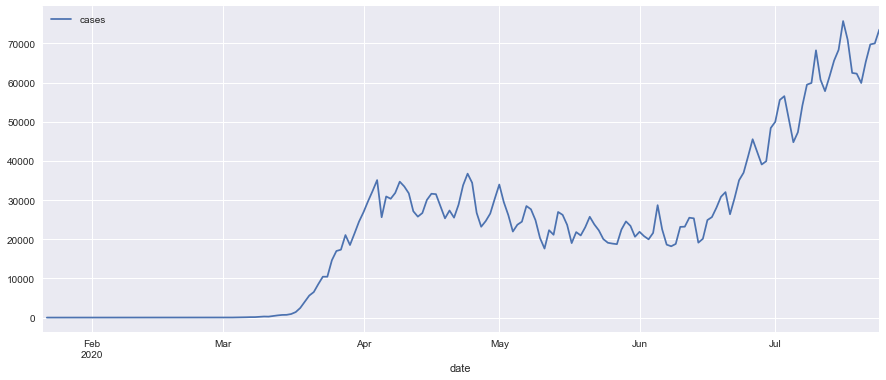

In [63]:
# Plot differenced data

data_daily_diff.plot()

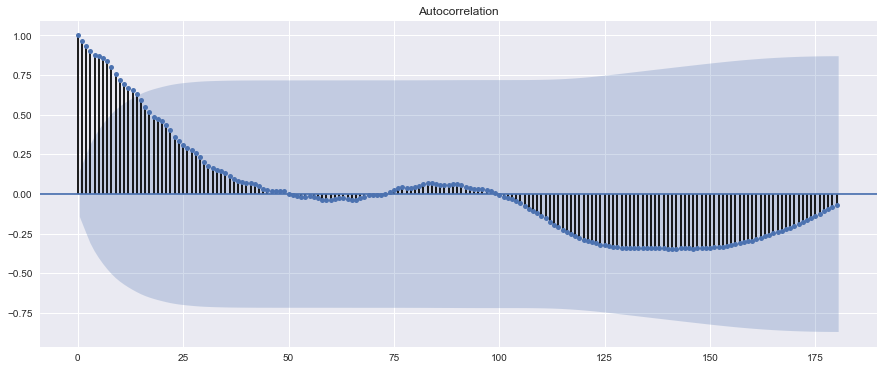

In [66]:
# Plot ACF for differenced data
plot_acf(data_daily_diff.dropna(), lags=180);

date
2020-01-21            NaN
2020-01-22            NaN
2020-01-23            NaN
2020-01-24   -2459.810612
2020-01-25   -3191.838085
2020-01-26    -818.656766
2020-01-27    1429.601476
2020-01-28    2446.991586
2020-01-29    2291.419058
2020-01-30     301.721915
Freq: D, Name: resid, dtype: float64
date
2020-07-15   -2504.009513
2020-07-16    4507.579058
2020-07-17    6214.475102
2020-07-18    1528.304772
2020-07-19    -430.085338
2020-07-20   -4089.112810
2020-07-21   -3959.722700
2020-07-22            NaN
2020-07-23            NaN
2020-07-24            NaN
Freq: D, Name: resid, dtype: float64


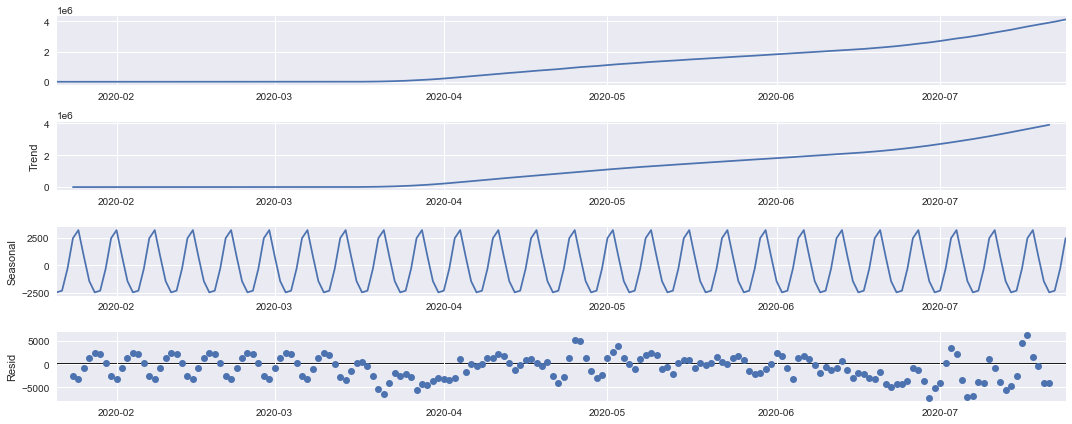

In [69]:
# Plot seasonal decomposition of data_daily again
seasonal_decompose(data_daily).plot()

# Extract residuals and save
data_daily_resid = seasonal_decompose(data_daily).resid

# Print the head and tail of the residual component
print(data_monthly_resid.head(10))
print(data_monthly_resid.tail(10))

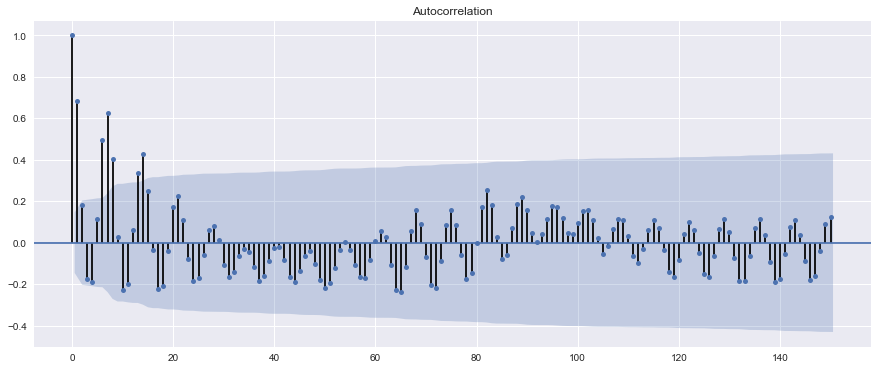

In [72]:
# Drop NaN values from residuals
data_daily_resid = data_daily_resid.dropna()

# Plot ACF of the residual component of data_monthly
plot_acf(data_daily_resid, lags=150);

In [73]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit the model to data_monthly_diff
model = ARMA(data_daily_resid, order=(0,5))
result = model.fit()

In [74]:
# Print summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  resid   No. Observations:                  180
Model:                     ARMA(0, 5)   Log Likelihood               -1577.182
Method:                       css-mle   S.D. of innovations           1539.955
Date:                Sat, 25 Jul 2020   AIC                           3168.365
Time:                        17:23:11   BIC                           3190.715
Sample:                    01-24-2020   HQIC                          3177.427
                         - 07-21-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -784.4779    312.408     -2.511      0.012   -1396.786    -172.170
ma.L1.resid     0.9929      0.080     12.355      0.000       0.835       1.150
ma.L2.resid     0.6955      0.116      5.984      0.000       0.468       0.923
ma.L3.resid     0.2455      0.142      1.731      0.083      -0.032       0.524
ma.L4.resid    -0.0293      0.107     -0.274      0.784      -0.239       0.180
ma.L5.resid    -0.1714      0.073     -2.342      0.019      -0.315      -0.028
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0832           -0.6597j            1.2683           -0.4129
MA.2           -1.0832           +0.6597j            1.2683            0.4129
MA.3           -0.0887           -1.2887j            1.2917           -0.2609
MA.4           -0.0887           +1.2887j            1.2917            0.2609
MA.5            2.1732           -0.0000j            2.1732           -0.0000
-----------------------------------------------------------------------------
"""

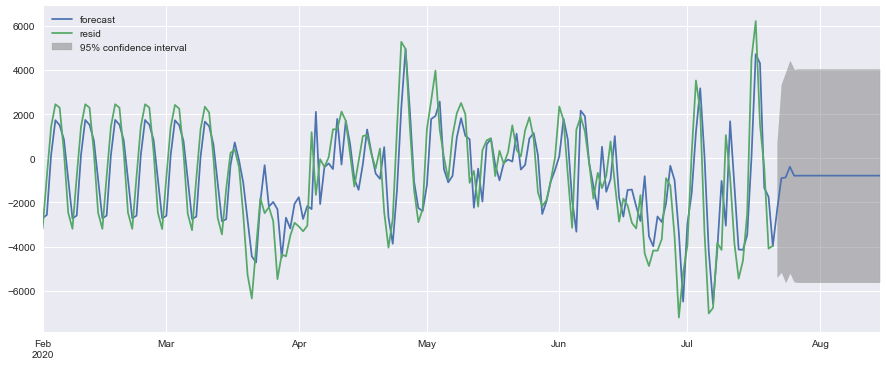

In [82]:

result.plot_predict(start="2020-02-01", end="2020-08-15");

In [84]:
print(result.predict(start="2020-02-01", end="2020-08-15"))

2020-02-01   -2708.781695
2020-02-02   -2561.659867
2020-02-03     156.931066
2020-02-04    1724.269432
2020-02-05    1498.349894
                 ...     
2020-08-11    -784.477879
2020-08-12    -784.477879
2020-08-13    -784.477879
2020-08-14    -784.477879
2020-08-15    -784.477879
Freq: D, Length: 197, dtype: float64
